<a href="https://colab.research.google.com/github/justy007/itdiving_case1/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Получаем библиотеки и выгружаем базу данных.**

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import dates as mdates

df = pd.read_csv('inf_ege_data.csv',
                 dtype={'attempts_cnt': 'UInt32', 'hints_cnt': 'UInt32'},
                 parse_dates=['date'])

# **Анализируем данные из полученной базы.**

**Получение укороченной таблицы.**

In [43]:
df.head(5)

,date,attempts_cnt,difficulty,flow_type,hints_cnt,is_correct,task_id,task_number,user_id
0,2024-03-26,<NA>,4,variant,<NA>,False,73,1,184921
1,2024-03-26,<NA>,4,variant,<NA>,False,73,1,361
2,2024-03-26,<NA>,4,variant,<NA>,False,73,1,40784
3,2024-03-26,<NA>,4,variant,<NA>,False,73,1,124954
4,2024-03-26,<NA>,4,variant,<NA>,False,73,1,119665


**Получение DAU (Количество пользователей за день)**

In [44]:
dau = df.groupby(df['date'].dt.date)['user_id'].nunique().reset_index(name='DAU')
dau

,date,DAU
0,2023-11-01,508
1,2023-11-02,617
2,2023-11-03,514
3,2023-11-04,331
4,2023-11-05,247
...,...,...
238,2024-06-26,626
239,2024-06-27,542
240,2024-06-28,445
241,2024-06-29,443


In [45]:
print('Минимальное количество пользователей в один из дней:', dau.DAU.min())
print('Максимальное количество пользователей в один из дней:', dau.DAU.max())

Минимальное количество пользователей в один из дней: 59
Максимальное количество пользователей в один из дней: 6159


**Получение WAU (Количество пользователей за неделю)**

In [46]:
wau = df.set_index('date').resample('W')['user_id'].nunique().reset_index(name='WAU')
wau

,date,WAU
0,2023-11-05,1998
1,2023-11-12,3227
2,2023-11-19,2668
3,2023-11-26,2100
4,2023-12-03,1956
5,2023-12-10,1618
6,2023-12-17,2061
7,2023-12-24,1650
8,2023-12-31,891
9,2024-01-07,524


In [47]:
print('Минимальное количество пользователей в одну из недель:', wau.WAU.min())
print('Максимальное количество пользователей в одну из недель:', wau.WAU.max())

Минимальное количество пользователей в одну из недель: 524
Максимальное количество пользователей в одну из недель: 14665


**Получение MAU (Количество пользователей за месяц)**

In [54]:
mau = df.set_index('date').resample('M')['user_id'].nunique().reset_index(name='MAU')

In [49]:
print('Минимальное количество пользователей в один из месяцев:', mau.MAU.min())
print('Максимальное количество пользователей в один из месяцев:', mau.MAU.max())

Минимальное количество пользователей в один из месяцев: 5575
Максимальное количество пользователей в один из месяцев: 31917


# **Визуализируем ключевые метрики (DAU, WAU, MAU)**

**Визуализация DAU (с интервалом текста в 7 дней, для избежания наложения текста друг на друга)**

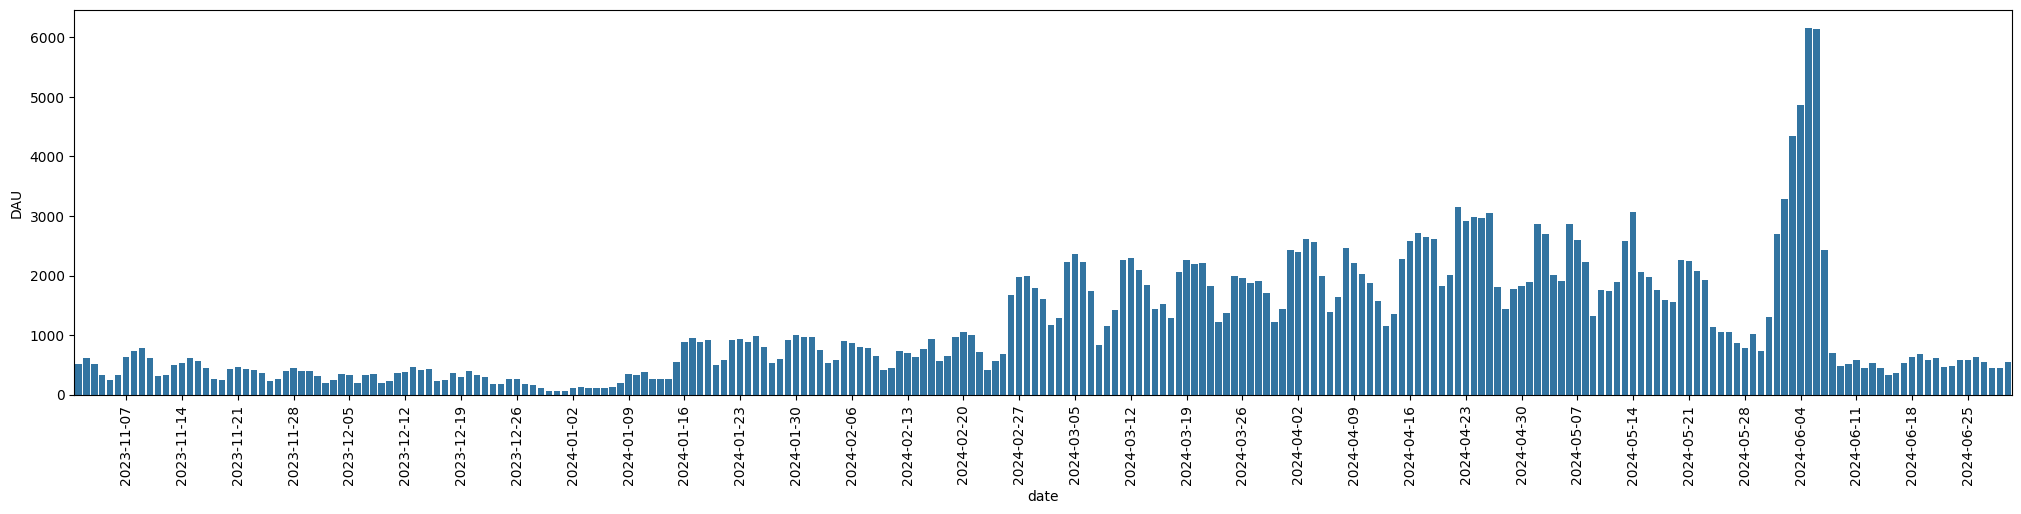

In [51]:
plt.figure(figsize=(25, 5))

ax = sns.barplot(x=dau['date'], y=dau['DAU'])

ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))

plt.xticks(rotation=90)

plt.show()


**Визуализация WAU**

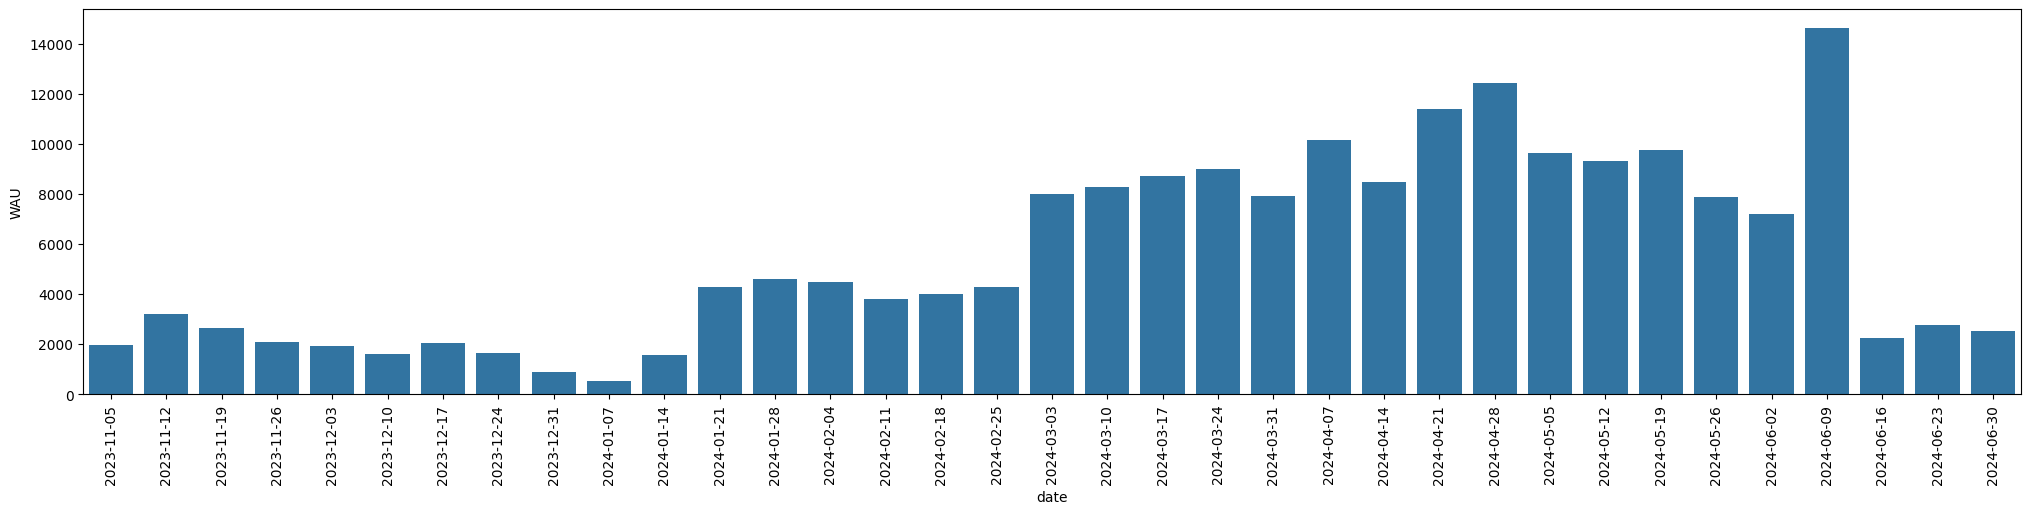

In [52]:
plt.figure(figsize=(25, 5))

sns.barplot(x=wau['date'], y=wau['WAU'])

plt.xticks(rotation=90)

plt.show()

**Визуализация MAU**

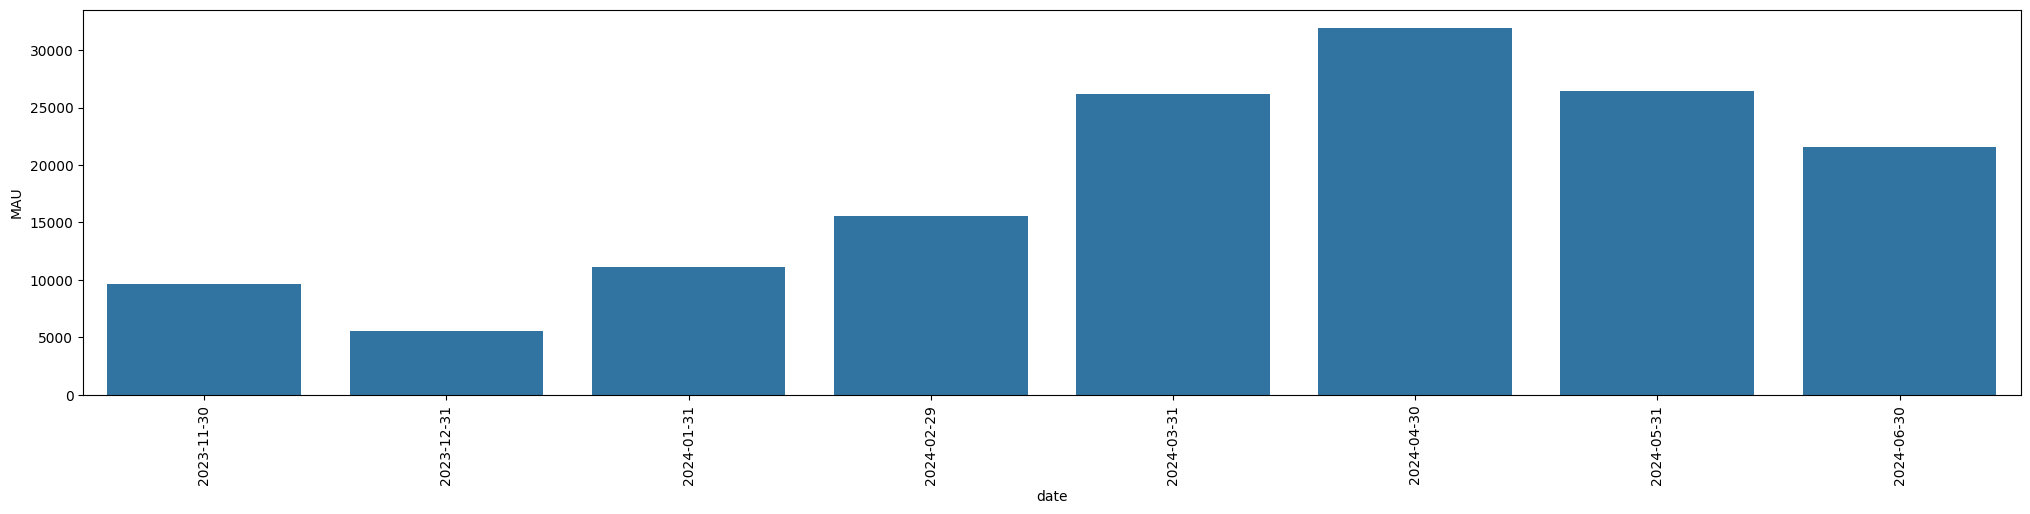

In [53]:
plt.figure(figsize=(25, 5))

sns.barplot(x=mau['date'], y=mau['MAU'])

plt.xticks(rotation=90)

plt.show()